In [1]:
import os
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops

In [2]:
def mask2bbox(mask):
    """给定一个mask，返回所有的bbox: [y, x, h, w]"""
    lbl = label(mask) 
    props = regionprops(lbl)
    bbox = [[prop.bbox[1], prop.bbox[2], prop.bbox[3], prop.bbox[2]] for prop in props]
    return bbox

In [3]:
ImageId = '30017'
img = imread(os.path.join('./', ImageId + ".jpg"))
mask = imread(os.path.join("./", ImageId + "_gt.bmp"))[:, :, 0]

In [4]:
mask2bbox(mask)

[[318, 113, 356, 113], [18, 242, 167, 242]]

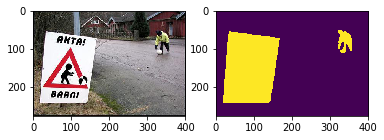

In [5]:
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(mask)

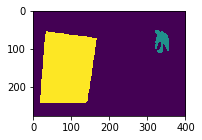

In [6]:
lbl_0 = label(mask) 
props = regionprops(lbl_0)
plt.subplot(121)
plt.imshow(lbl_0)

In [7]:
print(props)

[<skimage.measure._regionprops._RegionProperties object at 0x00000289A12DB7F0>, <skimage.measure._regionprops._RegionProperties object at 0x00000289A12DB240>]


In [8]:
for prop in props:
        print('Found bbox', prop.bbox)
        cv2.rectangle(img, (prop.bbox[1], prop.bbox[0]), (prop.bbox[3], prop.bbox[2]), (255, 0, 0), 2)

Found bbox (52, 318, 113, 356)
Found bbox (55, 18, 242, 167)


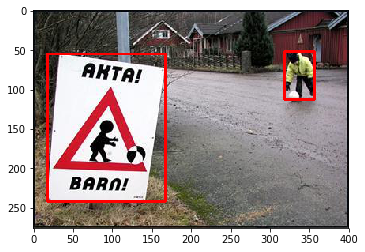

In [9]:
plt.imshow(img)